In [137]:

import skrf as rf
import numpy as npy
from skrf.constants import *
%matplotlib inline
from pylab import * 
rf.stylely()

T = 300
frequency = rf.Frequency(start=1, stop=200e6, npoints=401, unit='Hz', sweep_type='log')

Rtip = 9e6
Ctip = 20e-12
tau_tip = Rtip*Ctip

Rs = 1e6
Cs = 20e-12

Ccomp = 160e-12 # 70 pF for compensation

Ctotal = Cs + Ccomp

# simulate measurement
ntwk_Rthev = rf.noisyComponents.RLC_Series_2port(R = 1000, frequency=frequency, T0 = T)
ntwk_Rload = rf.noisyComponents.RLC_Shunt_2port(R = 1000, frequency=frequency, T0 = T)

ntwk_Rtip = rf.noisyComponents.RLC_Series_2port(R = Rtip, frequency=frequency, T0 = T)
ntwk_Ctip = rf.noisyComponents.RLC_Series_2port(C = Ctip, frequency=frequency, T0 = T)

ntwk_scope = rf.noisyComponents.RLC_Shunt_2port(R = Rs, C = Ctotal, frequency=frequency, T0 = T)

# ntwkT = ntwk_Rthev** ntwk_Rload ** (ntwk_Rtip | ntwk_Ctip) ** ntwk_scope

ntwkT =  (ntwk_Rtip | ntwk_Ctip) ** ntwk_scope

ntwkT_loaded = ntwk_Rthev ** ntwkT

Vin = 10
Vout = Vin/(ntwkT_loaded.a[:, 0, 0]) 




In [70]:
print(56e-12*9)


5.04e-10


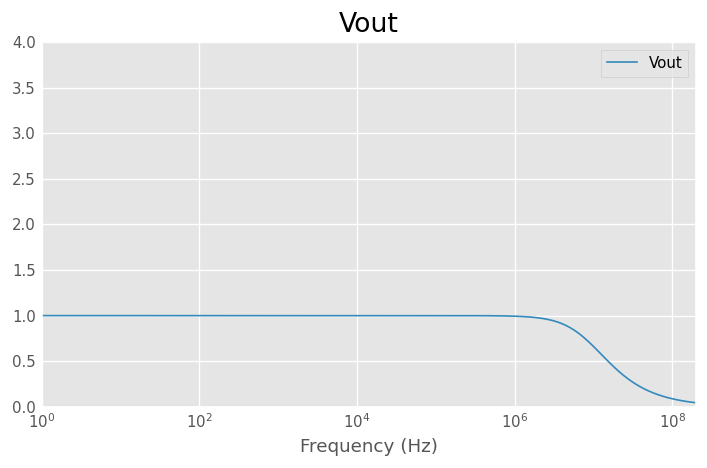

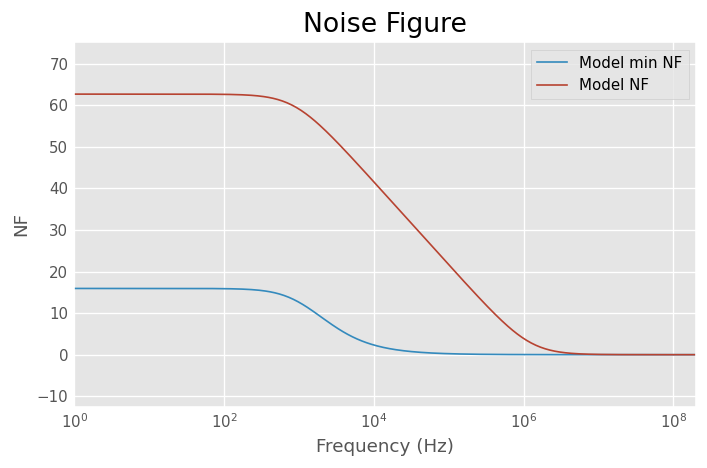

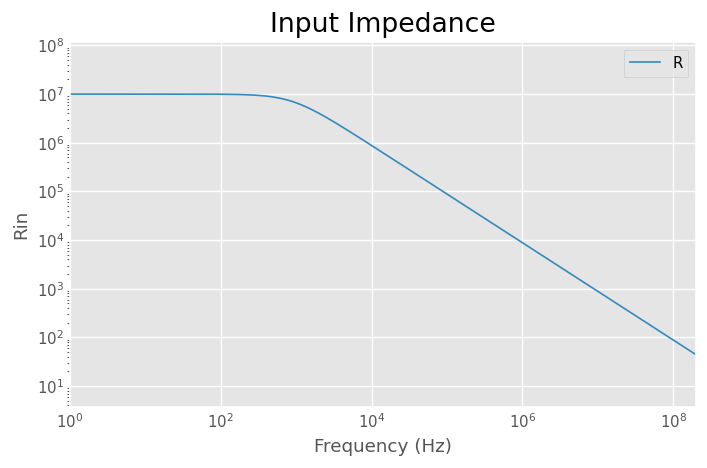

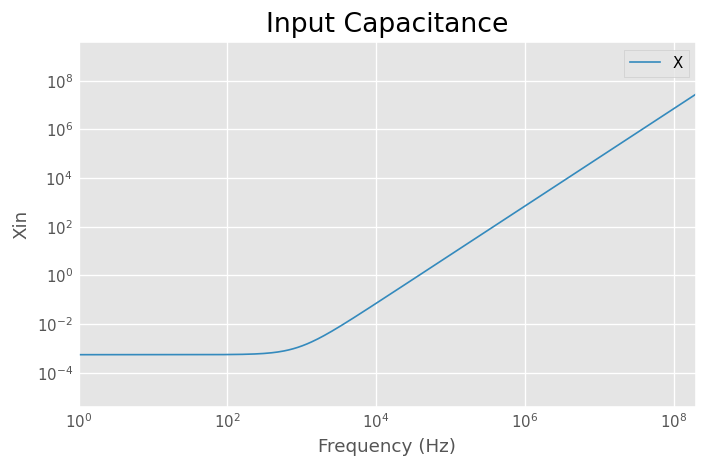

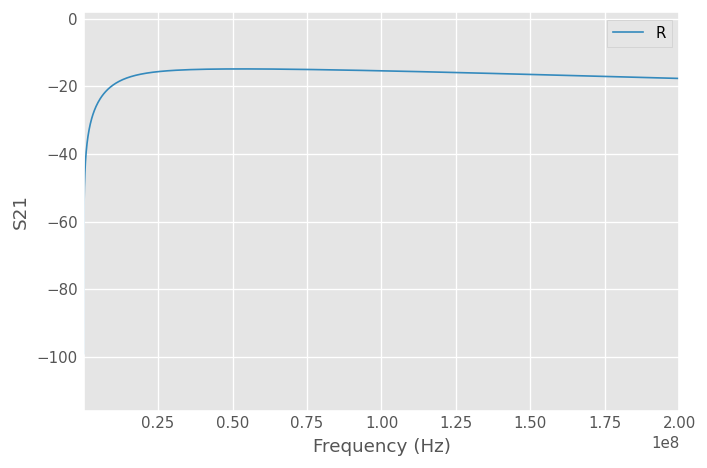

In [145]:
model_nfmin_db = ntwkT.nfmin_db
z0 = 50
model_nf_db = ntwkT.nf_db(z0)
sparams = ntwkT.s_db
npy.max(sparams)                                

from skrf.plotting import func_on_all_figs as foaf

figure(0)
title('Vout')
semilogx(frequency.f_scaled, npy.abs(Vout), label=r'Vout')
ylim(0, 4)
# semilogx(frequency.f_scaled, sparams[:,0,0], label=r'S11')
foaf(frequency.labelXAxis)
foaf(tight_layout)
foaf(legend)
tight_layout()

figure(1)
ylabel('NF')
title('Noise Figure')
semilogx(frequency.f_scaled, model_nfmin_db, label=r'Model min NF')
semilogx(frequency.f_scaled, model_nf_db, label=r'Model NF')

# ylim(0,30)
foaf(frequency.labelXAxis)
foaf(tight_layout)
foaf(legend)
tight_layout()

figure(2)
ylabel('Rin')
title('Input Impedance')
loglog(frequency.f_scaled, npy.abs(ntwkT.z[:, 0, 0]), label=r'R')

# ylim(0,30)
foaf(frequency.labelXAxis)
foaf(tight_layout)
foaf(legend)
tight_layout()

figure(3)
ylabel('Xin')
title('Input Capacitance')
loglog(frequency.f_scaled, -1/npy.imag(ntwkT.z[:, 0, 0]), label=r'X')

# ylim(0,30)
foaf(frequency.labelXAxis)
foaf(tight_layout)
foaf(legend)
tight_layout()

figure(4)
ylabel('S21')
plot(frequency.f_scaled, sparams[:,1,0], label=r'R')

# ylim(0,30)
foaf(frequency.labelXAxis)
foaf(tight_layout)
foaf(legend)
tight_layout()


# Note that the voltage out might be flat, but you start capacitively loading the DUT


In [132]:
npy.imag(ntwkT.z[:, 0, 0])

array([-1.13097151e+04, -1.18632644e+04, -1.24439126e+04, -1.30529680e+04,
       -1.36918432e+04, -1.43619886e+04, -1.50649333e+04, -1.58022599e+04,
       -1.65757040e+04, -1.73869893e+04, -1.82379780e+04, -1.91306171e+04,
       -2.00669506e+04, -2.10491180e+04, -2.20793618e+04, -2.31600105e+04,
       -2.42935453e+04, -2.54825593e+04, -2.67297847e+04, -2.80380582e+04,
       -2.94103556e+04, -3.08497974e+04, -3.23597012e+04, -3.39434755e+04,
       -3.56048119e+04, -3.73474172e+04, -3.91753190e+04, -4.10926948e+04,
       -4.31038518e+04, -4.52134933e+04, -4.74263644e+04, -4.97475509e+04,
       -5.21822616e+04, -5.47361487e+04, -5.74150081e+04, -6.02249959e+04,
       -6.31724413e+04, -6.62641474e+04, -6.95070886e+04, -7.29087784e+04,
       -7.64768097e+04, -8.02195170e+04, -8.41453190e+04, -8.82631228e+04,
       -9.25823752e+04, -9.71129385e+04, -1.01865125e+05, -1.06849785e+05,
       -1.12078269e+05, -1.17562369e+05, -1.23314712e+05, -1.29348402e+05,
       -1.35676967e+05, -